In [43]:
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [50]:
output_path = 'hackHPI-parser/output.json'
cluster_path = "hackHPI-parser/our_output_50.json"

In [54]:
data = json.load(open(output_path))
graph = data['graph']
buildings = data['buildings']
buildings_df = pd.DataFrame(buildings)
areas = data['areas']
areas_df = pd.DataFrame(areas)
roads = data['roads']
roads_df = pd.DataFrame(roads)

roads_df

id                                   point
0      37850  {'lat': 52.4826449, 'lon': 13.1234984}
1      37851  {'lat': 52.4826292, 'lon': 13.1236652}
2      37852  {'lat': 52.4826075, 'lon': 13.1238401}
3      37853  {'lat': 52.4825542, 'lon': 13.1239252}
4      37854  {'lat': 52.4824954, 'lon': 13.1239509}
...      ...                                     ...
51943  89793   {'lat': 52.3762594, 'lon': 13.016218}
51944  89794   {'lat': 52.3765709, 'lon': 13.016866}
51945  89795  {'lat': 52.3844082, 'lon': 13.1219433}
51946  89796  {'lat': 52.3841096, 'lon': 13.1219036}
51947  89797  {'lat': 52.3840732, 'lon': 13.1218988}

[51948 rows x 2 columns]

In [101]:
def get_roads():
    # Extract all road IDs and latitudes/longitudes into NumPy arrays
    road_ids = roads_df['id'].values
    latitudes = np.array([point['lat'] for point in roads_df['point']])
    longitudes = np.array([point['lon'] for point in roads_df['point']])
    
    road_connections = []

    for idx, road_id in enumerate(road_ids):
        # Get connected road nodes for the current road
        connected_roads_nodes = graph[road_id]["children"]
        connected_roads_nodes_ids = [node['Node'] for node in connected_roads_nodes]
        
        # Find indices of connected roads in the DataFrame
        connected_roads_idx = np.where(np.isin(road_ids, connected_roads_nodes_ids))[0]
        
        # Extract connected roads' latitudes and longitudes
        connected_roads_latitudes = latitudes[connected_roads_idx]
        connected_roads_longitudes = longitudes[connected_roads_idx]
        
        # Append to road_connections list
        for i in range(len(connected_roads_idx)):
            road_connections.append([[latitudes[idx], longitudes[idx]], [connected_roads_latitudes[i], connected_roads_longitudes[i]]])

    return road_connections

road_connections = get_roads()
road_connections

[[[52.4826449, 13.1234984], [52.4826292, 13.1236652]],
 [[52.4826292, 13.1236652], [52.4826449, 13.1234984]],
 [[52.4826292, 13.1236652], [52.4826075, 13.1238401]],
 [[52.4826075, 13.1238401], [52.4826292, 13.1236652]],
 [[52.4825542, 13.1239252], [52.4824954, 13.1239509]],
 [[52.4824954, 13.1239509], [52.4825542, 13.1239252]],
 [[52.4824954, 13.1239509], [52.4821322, 13.1238372]],
 [[52.4821322, 13.1238372], [52.4824954, 13.1239509]],
 [[52.4821322, 13.1238372], [52.4817504, 13.1237112]],
 [[52.4817504, 13.1237112], [52.4821322, 13.1238372]],
 [[52.4817504, 13.1237112], [52.4817002, 13.1236566]],
 [[52.4817002, 13.1236566], [52.4817504, 13.1237112]],
 [[52.4817002, 13.1236566], [52.4816771, 13.1235851]],
 [[52.4816771, 13.1235851], [52.4817002, 13.1236566]],
 [[52.4816758, 13.1234984], [52.4816945, 13.1231981]],
 [[52.4816945, 13.1231981], [52.4816758, 13.1234984]],
 [[52.4037329, 13.0656277], [52.4040343, 13.0655037]],
 [[52.4040343, 13.0655037], [52.4037329, 13.0656277]],
 [[52.4040

In [102]:
def plot_cluster(min_lat, max_lat, min_lon, max_lon, buildings, outliers, pumps, connections):
    # for building in buildings:
    #     plt.plot(building[0], building[1], 'bo')
    buildings_x = [building[0] for building in buildings]
    buildings_y = [building[1] for building in buildings]
    outliers_x = [outlier[0] for outlier in outliers]
    outliers_y = [outlier[1] for outlier in outliers]
    pumps_x = [pump[0] for pump in pumps]
    pumps_y = [pump[1] for pump in pumps]
    #roads_filtered = get_roads(min_lat, max_lat, min_lon, max_lon, roadsdf)


    plt.scatter(buildings_x, buildings_y, c='b', marker='o', s=20)
    plt.scatter(outliers_x, outliers_y, c='r', marker='o', s=20)
    plt.scatter(pumps_x, pumps_y, c='y', marker='o', s=4)
    for connection in road_connections:
        if connection[0][0] < min_lat or connection[0][0] > max_lat or connection[0][1] < min_lon or connection[0][1] > max_lon:
            continue
        if connection[1][0] < min_lat or connection[1][0] > max_lat or connection[1][1] < min_lon or connection[1][1] > max_lon:
            continue
        plt.plot([connection[0][0], connection[1][0]], [connection[0][1], connection[1][1]], 'g-', linewidth=0.6)
    for connection in connections:
        if connection[0][0] < min_lat or connection[0][0] > max_lat or connection[0][1] < min_lon or connection[0][1] > max_lon:
            continue
        if connection[1][0] < min_lat or connection[1][0] > max_lat or connection[1][1] < min_lon or connection[1][1] > max_lon:
            continue
        plt.plot([connection[0][0], connection[1][0]], [connection[0][1], connection[1][1]], 'r-', linewidth=0.6)
    plt.show()
    

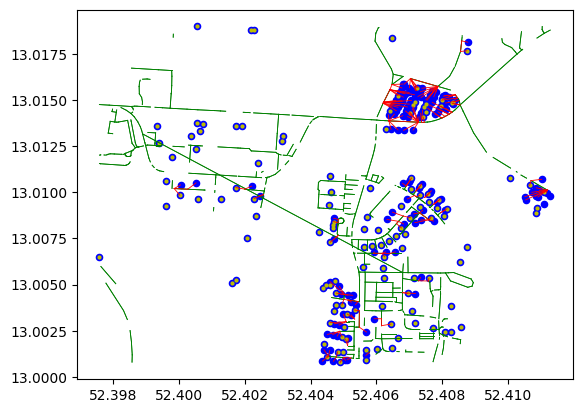

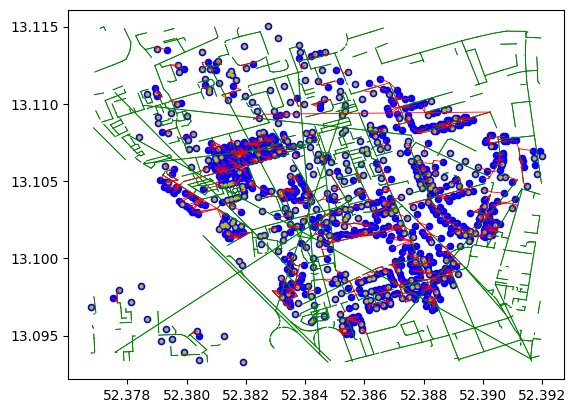

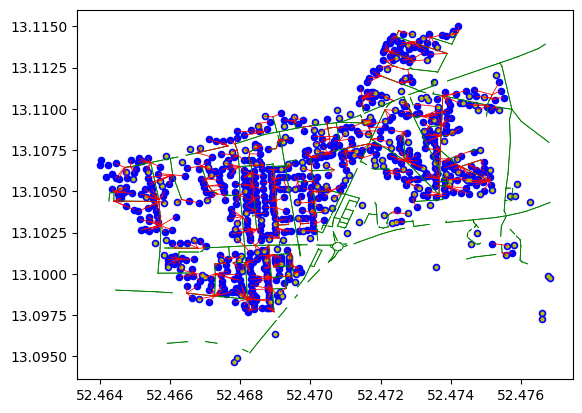

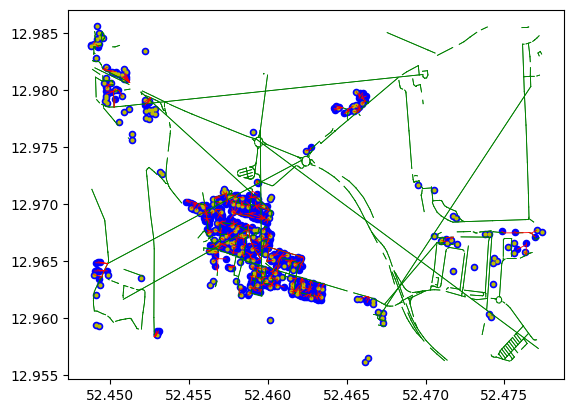

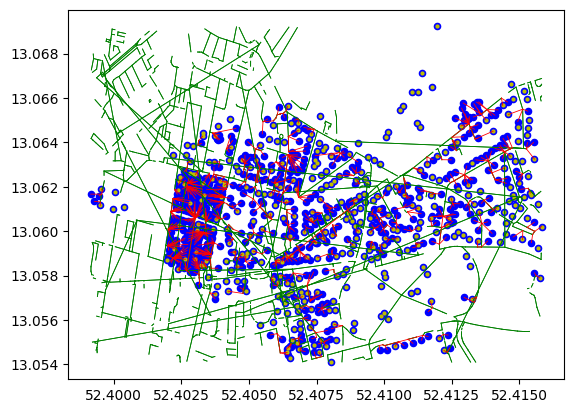

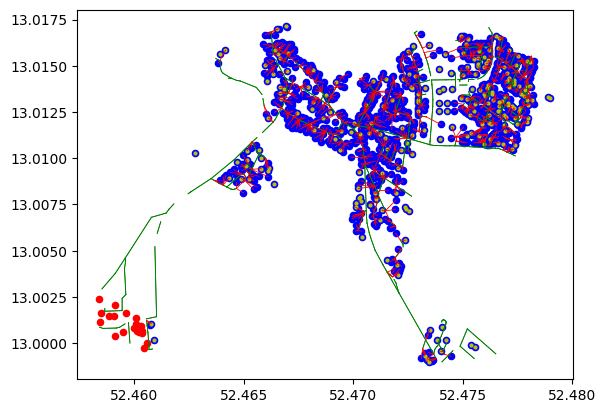

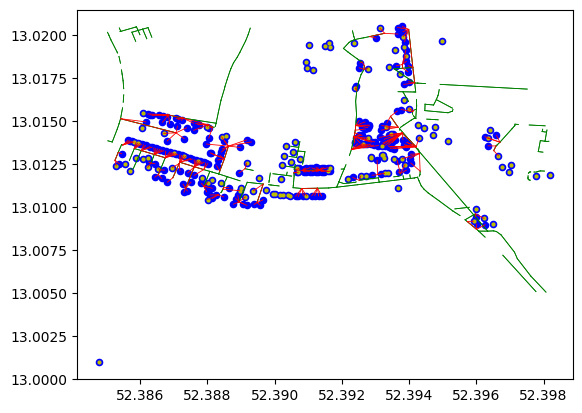

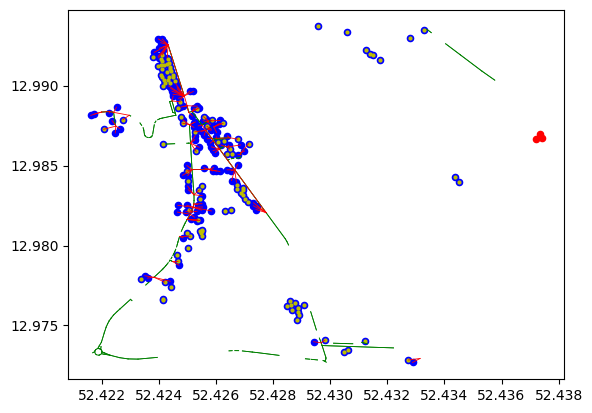

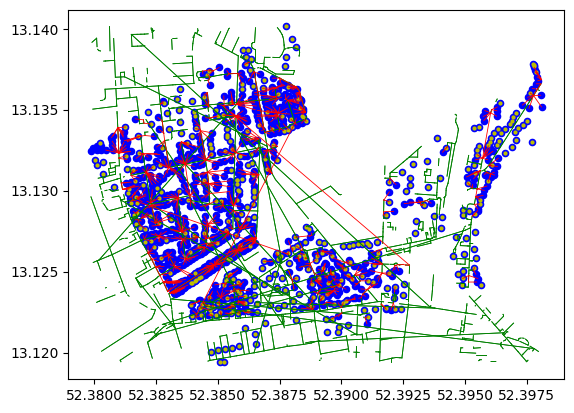

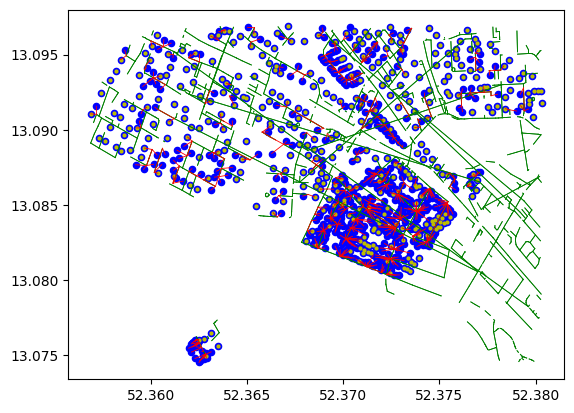

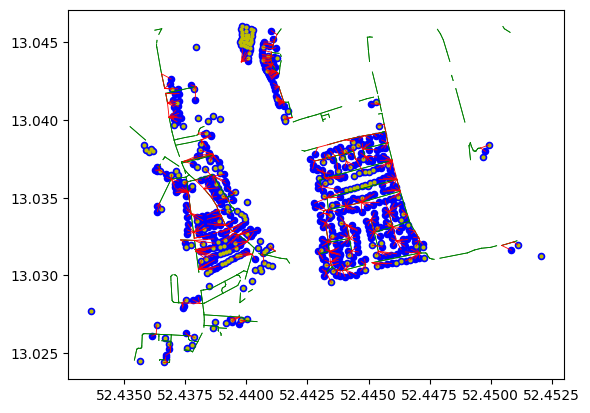

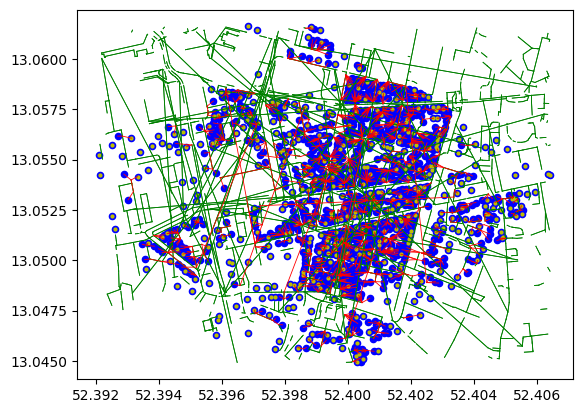

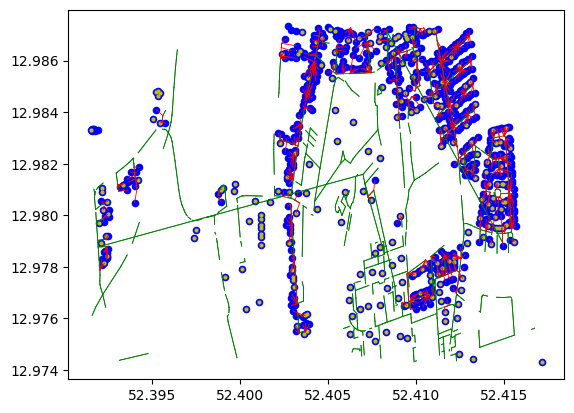

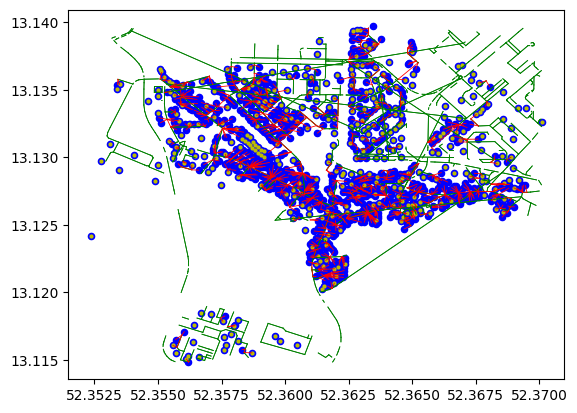

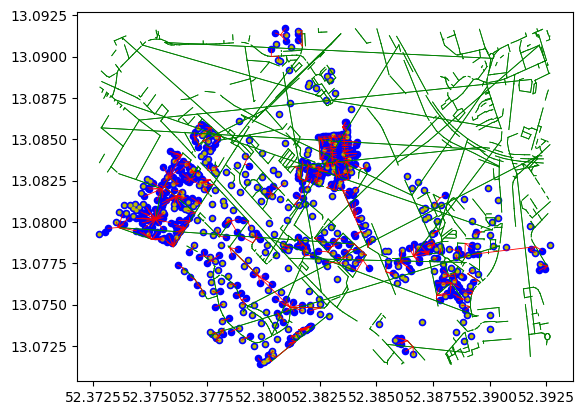

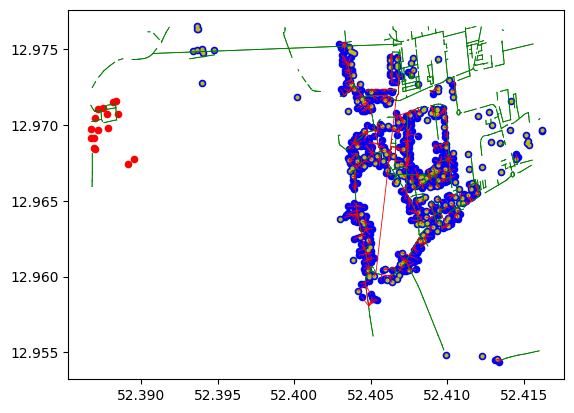

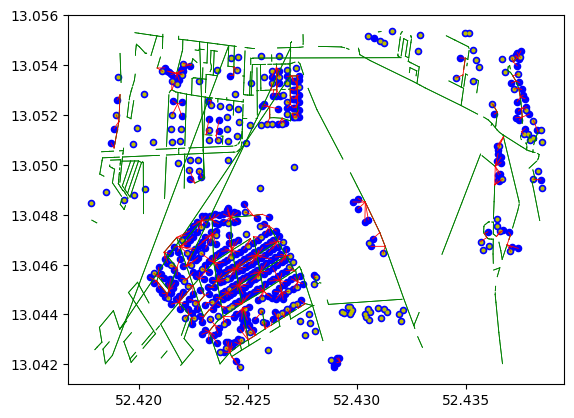

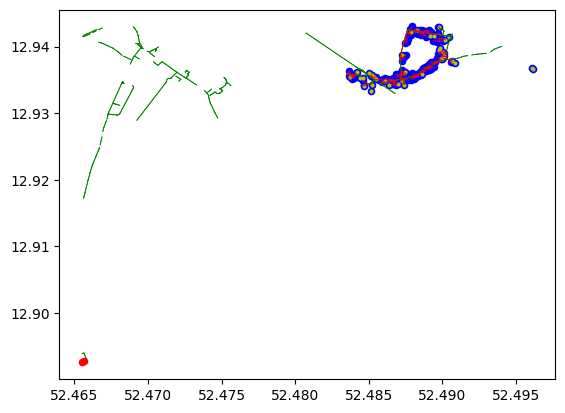

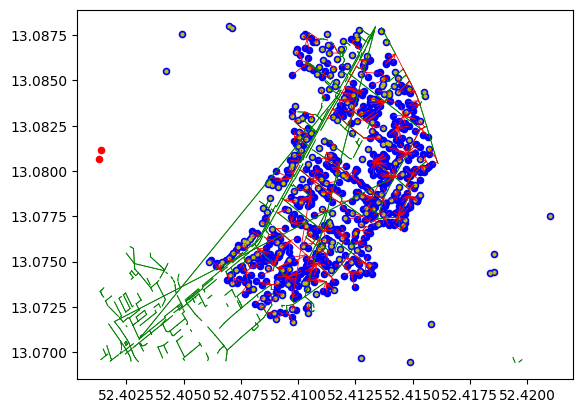

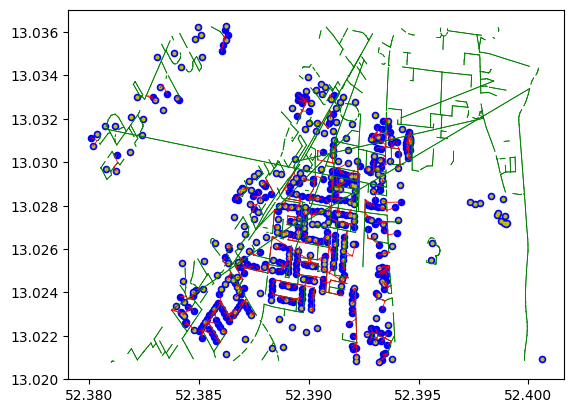

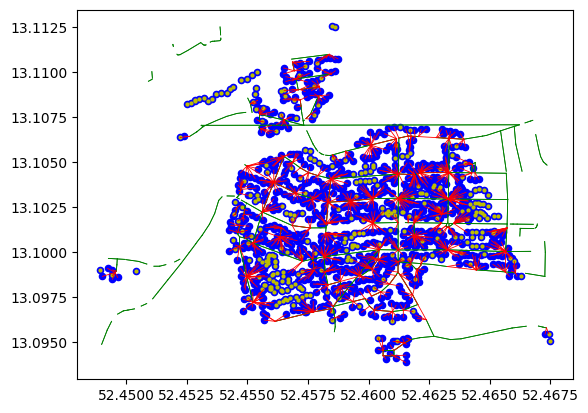

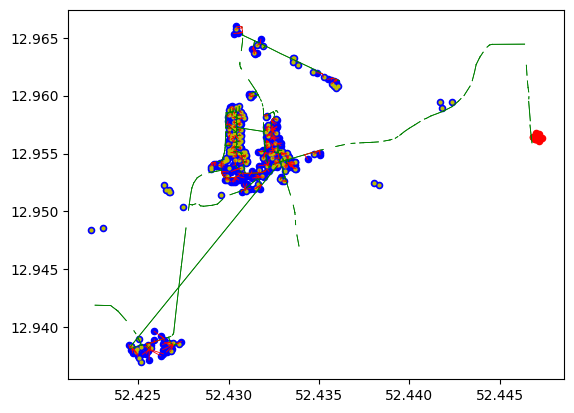

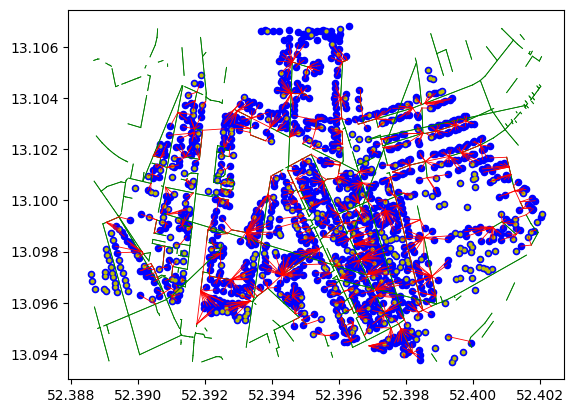

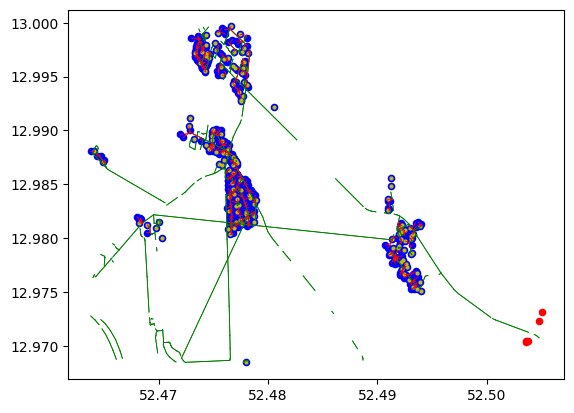

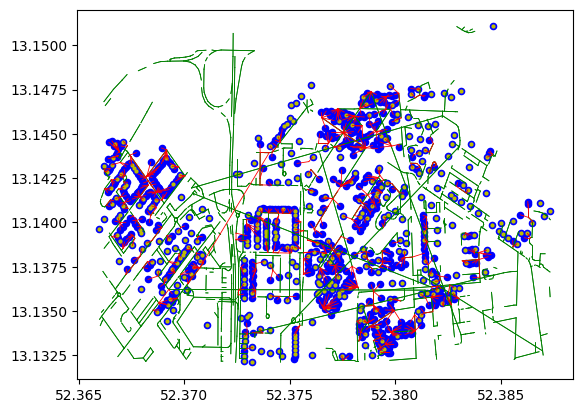

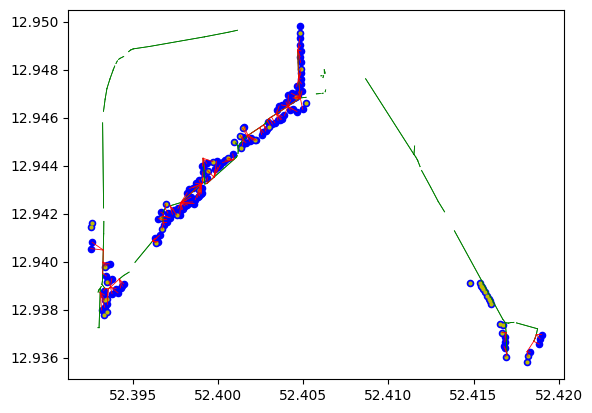

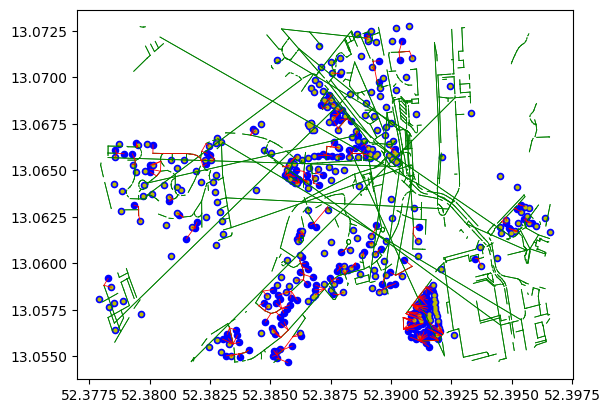

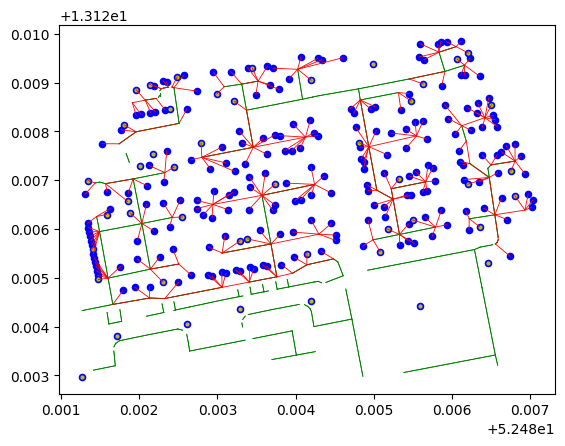

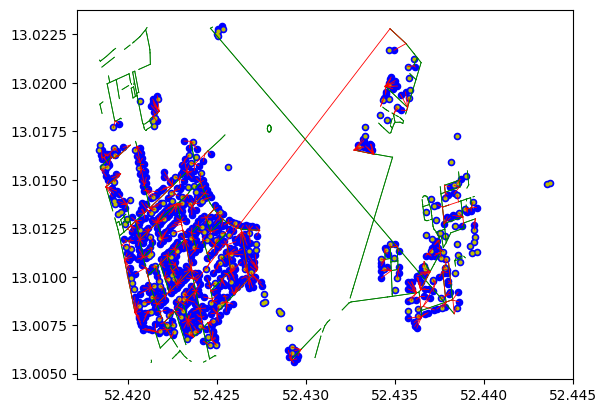

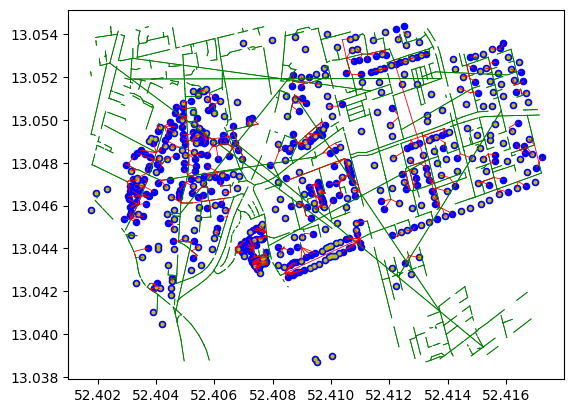

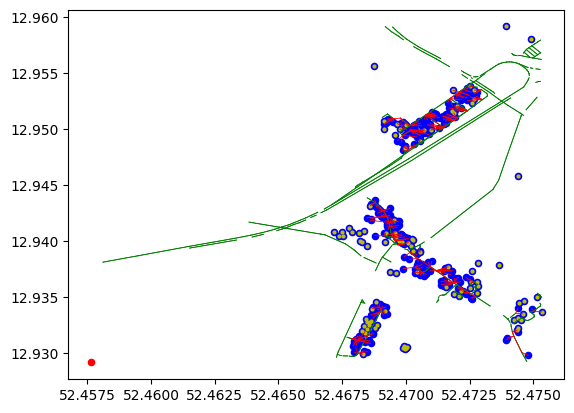

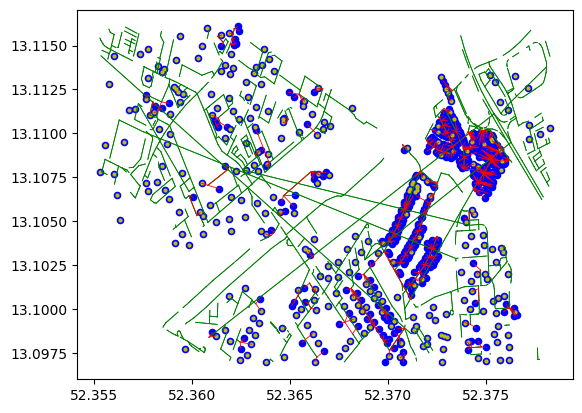

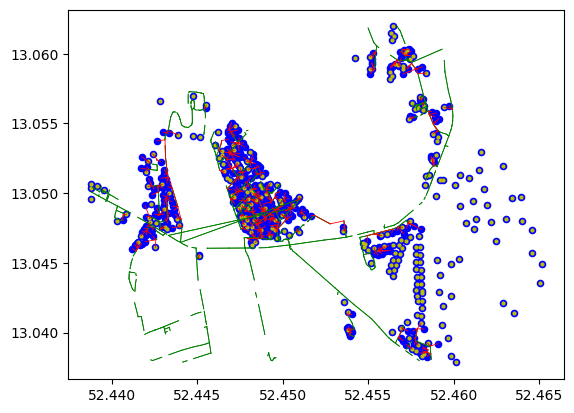

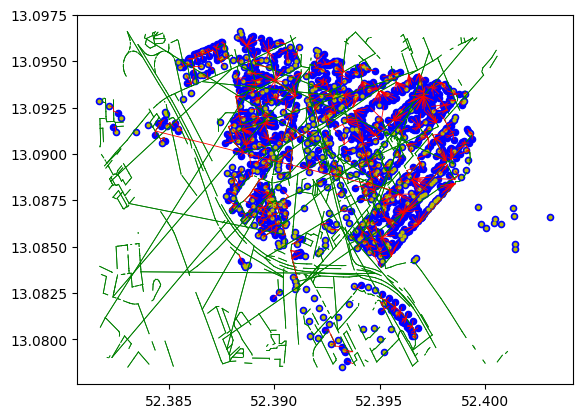

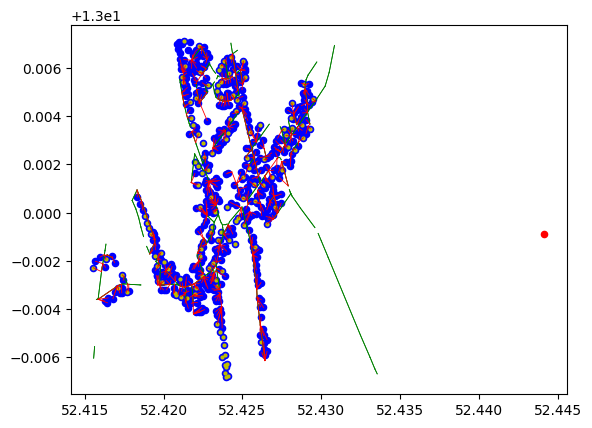

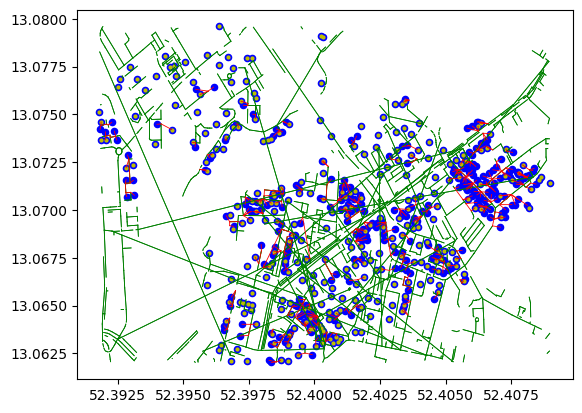

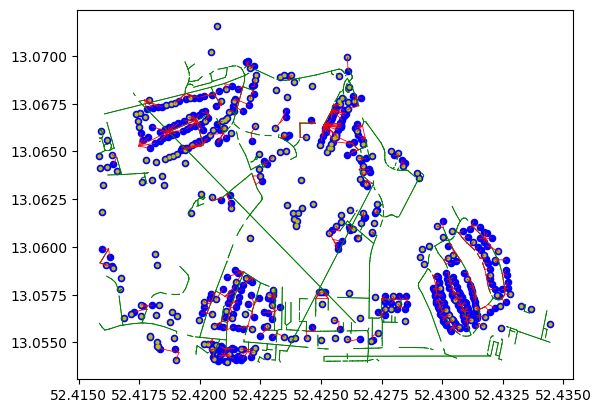

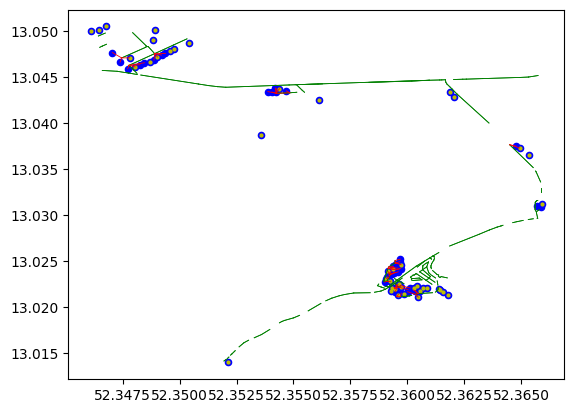

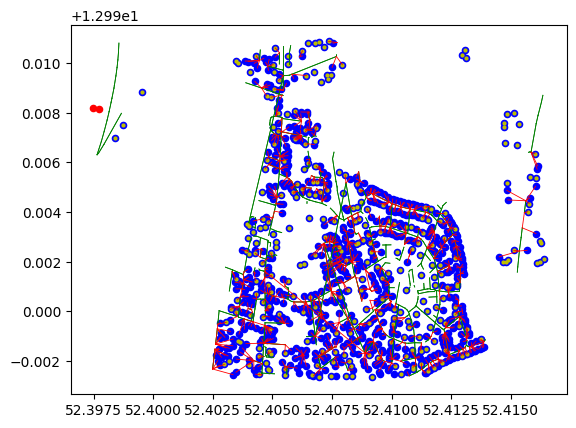

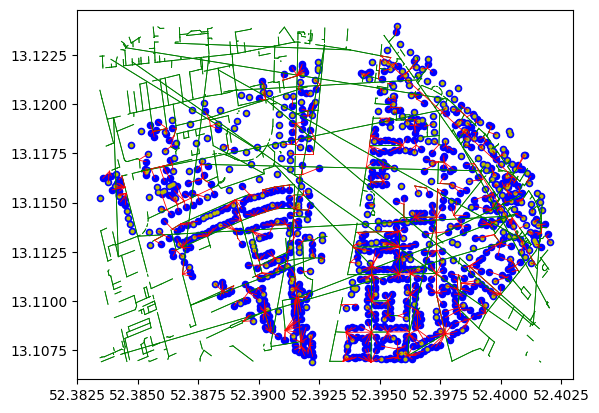

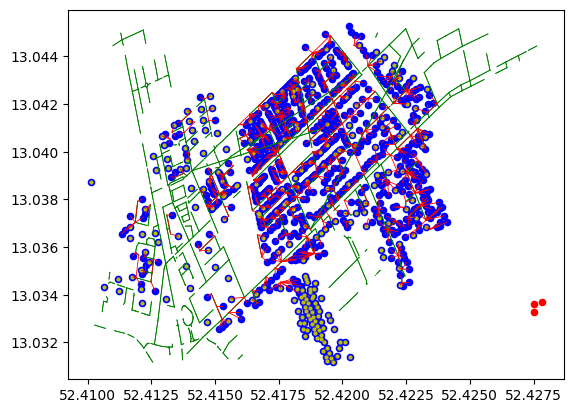

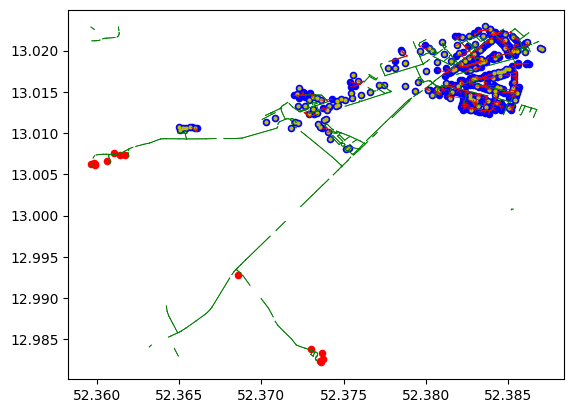

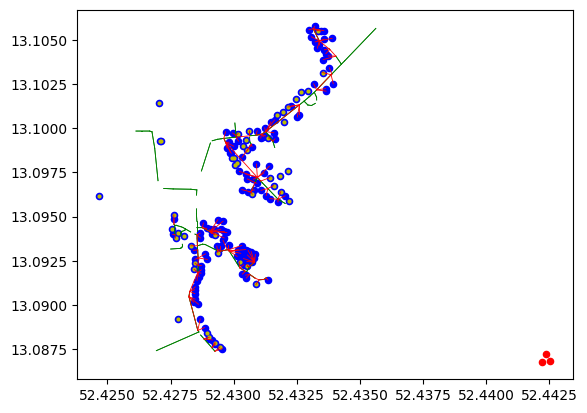

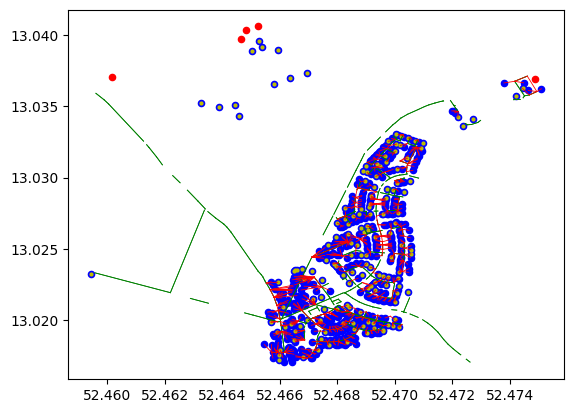

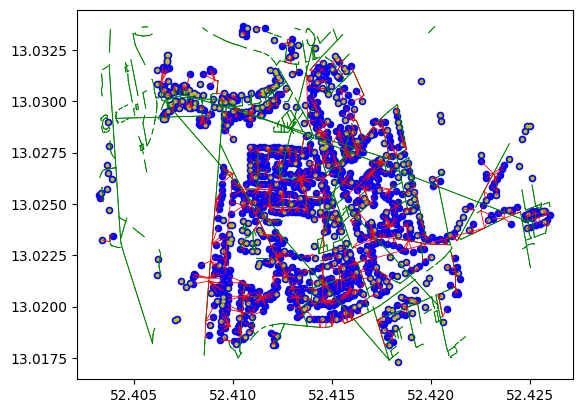

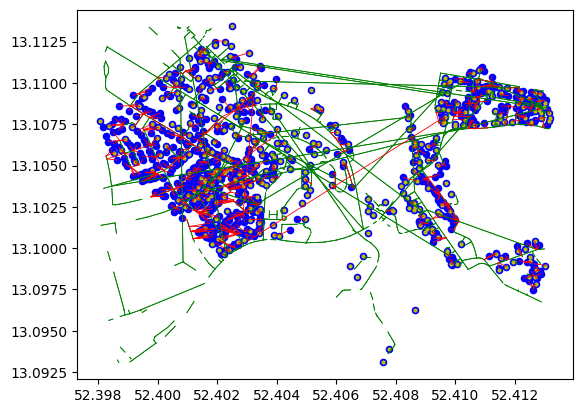

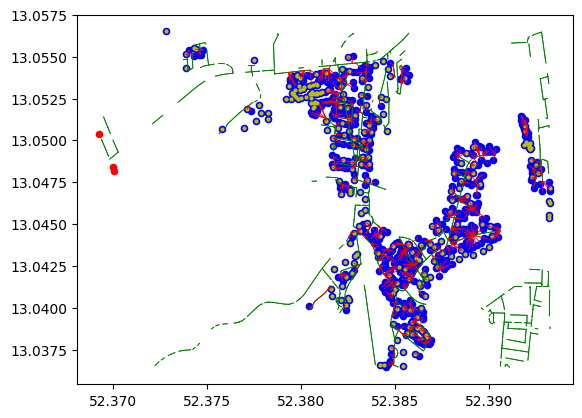

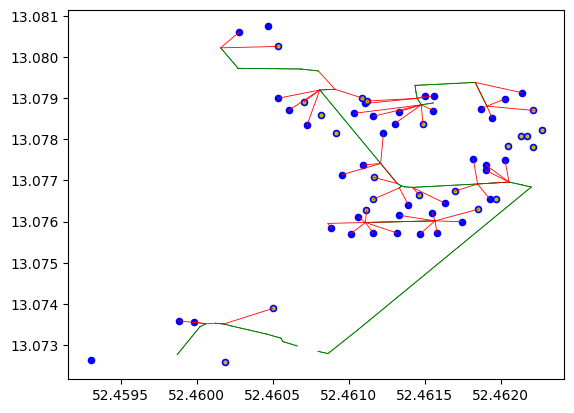

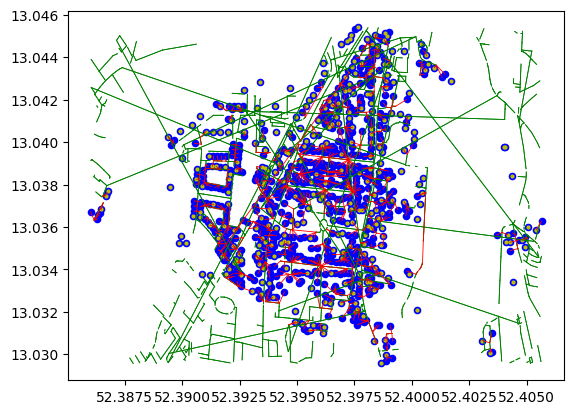

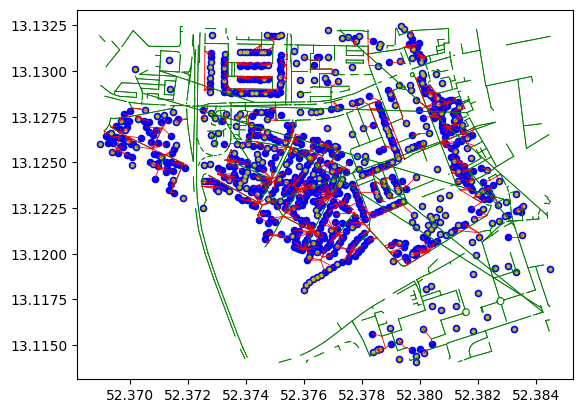

In [103]:
with open(cluster_path) as f:
    data = json.load(f)

clusters = data["clusters"]
for cluster in clusters:
    buildings = cluster['buildings']
    outliers = cluster['outliers']
    pumps = cluster['pumps']
    connections = cluster['connections']

    map_points = buildings + outliers + pumps
    min_lat = min([point[0] for point in map_points])
    max_lat = max([point[0] for point in map_points])
    min_lon = min([point[1] for point in map_points])
    max_lon = max([point[1] for point in map_points])
    plot_cluster(min_lat, max_lat, min_lon, max_lon, buildings, outliers, pumps, connections)
